In [66]:
# Feature Importance
# Dataset on customer churn

#Apache Spark for milion size records (also try duckdb?)
# Data Bricks has a community edition

In [67]:
#import all config and libraries
if __name__ == '__main__' and '__file__' not in globals():
    %run base.ipynb
    
#in case imports have updated this notebook will re-run
%reload_ext autoreload
%autoreload 2
# ernesto@ernesto.net

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok



 Numpy: 1.23.5

 sklearn: 1.2.1


In [68]:

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [69]:
#USER INPUT CELL

#Specify the file names here
# input_file=r"https://raw.githubusercontent.com/anantSinghCross/boston-housing-price-prediction/master/boston.csv"
input_file=r'https://raw.githubusercontent.com/fenago/datasets/main/churn.csv'
# input_file=r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
output_file=r"C:\Users\John\Downloads\mle\output_after_structural_analysis.parquet"
response_variable = 'TODO'
#TODO : using pathlib delete parquet if exists or create one and save df_raw

threshold_category=100 #if object type columns have unique count less than or equal to this then convert to categorical type
#since this dataset has all columns as category cast all of them into category

In [70]:
if input_file.endswith('csv'):
    df=pd.read_csv(input_file)

if input_file.endswith('xls') or input_file.endswith('xlsx'):
    df=pd.read_excel(input_file)


df.to_parquet(path=output_file,engine='pyarrow',index=False)

In [71]:
df=pd.read_parquet(output_file)
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.1,197.4,99,16.8,244.7,91,11.0,10.0,3,2.7,1
1,No,107,no,yes,26,161.6,123,27.5,195.5,103,16.6,254.4,103,11.4,13.7,3,3.7,1
2,No,137,no,no,0,243.4,114,41.4,121.2,110,10.3,162.6,104,7.3,12.2,5,3.3,0
3,No,84,yes,no,0,299.4,71,50.9,61.9,88,5.3,196.9,89,8.9,6.6,7,1.8,2
4,No,75,yes,no,0,166.7,113,28.3,148.3,122,12.6,186.9,121,8.4,10.1,3,2.7,3


In [110]:
# df.shape

df.isnull().sum()

df['churn'].astype('category')

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

0        No
1        No
2        No
3        No
4        No
       ... 
4995     No
4996    Yes
4997     No
4998     No
4999     No
Name: churn, Length: 5000, dtype: category
Categories (2, object): ['No', 'Yes']

In [73]:
df = df.fillna(0)  # Use with caution.  you eliminate the big holes and then small holes in your data before doing this
print(df.isnull().sum())
print(df.dtypes)

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64
churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                f

In [74]:
df.nunique()

churn                            2
accountlength                  218
internationalplan                2
voicemailplan                    2
numbervmailmessages             48
totaldayminutes               1961
totaldaycalls                  123
totaldaycharge                1961
totaleveminutes               1879
totalevecalls                  126
totalevecharge                1659
totalnightminutes             1853
totalnightcalls                131
totalnightcharge              1028
totalintlminutes               170
totalintlcalls                  21
totalintlcharge                170
numbercustomerservicecalls      10
dtype: int64

In [75]:
#separate out the categorical data and numerical data
# numerical data will be scaled
# categorical data will be OHE

- Standard Scaler: good when data is normalized BUT the features have different scales (works well with Log Reg, Lin Reg, SVM)
- Min-Max Scaler: resize them to a value between 0 and 1. When the data is NOT normalized and the features have diff scales.  Works well with larger models... NN... image processing
- Robust Scaler: good when the data has a lot of outliers or when there is NOT a normalized dataset. Good SVM, KNN [Robust Scaler is GOTO]
- Max Abs Scaler: goes from -1 to 1.  Good when there are positive and neg values in your dataset. Usually only used with NN.
- Power Transformer: good when the data is not normalized OR highly skeweed.  Good with most of the lin models and NN.

**scalers in sklearn**

**standard scaler** : good when data is normally distributed

The StandardScaler function in Scikit-Learn is used to standardize a dataset by subtracting the mean and scaling to unit variance. This operation is performed feature-wise in an independent way, meaning that each feature is standardized separately based on its own mean and standard deviation

The process of standardization involves transforming the data so that it has a mean of zero and a standard deviation of one. This helps to normalize the data and make it easier to compare features with different scales or units. The StandardScaler function works by first calculating the mean and standard deviation of each feature in the training set. It then subtracts the mean from each value and divides by the standard deviation to scale the values to unit variance.

ALL COLUMNS THAT YOU ARE SCALING SHOULD BE SCALED USING ONE METHOD. SO NORMALIZE DISTRIBUTIONS BEFORE SCALING


**MinMaxScaler**

You can use MinMaxScaler in Scikit-Learn when you want to scale your data to a specific range, usually between 0 and 1. This scaling technique is useful when you have features with different scales and ranges, and you want to normalize them so that they are on the same scale. MinMaxScaler shrinks the data within the given range by scaling features to a given range. It scales the data by subtracting the minimum value of each feature and then dividing by the range (the difference between the maximum and minimum values of each feature).You should use MinMaxScaler when you want to preserve the shape of your distribution while scaling your data. It is a non-distorting scaling technique that preserves the relationships between features in your dataset. This makes it suitable for datasets where preserving these relationships is important.However, if you have outliers in your dataset, you may want to consider using RobustScaler instead of MinMaxScaler. RobustScaler is more robust to outliers because it uses median and quartiles instead of mean and standard deviation for scaling.In general, it's good practice to fit your scaler using available training data before transforming both training and test data consistently.

In [76]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [77]:
df.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [78]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [79]:
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,25,265.1,110,45.1,197.4,99,16.8,244.7,91,11.0,10.0,3,2.7,1
1,107,26,161.6,123,27.5,195.5,103,16.6,254.4,103,11.4,13.7,3,3.7,1
2,137,0,243.4,114,41.4,121.2,110,10.3,162.6,104,7.3,12.2,5,3.3,0
3,84,0,299.4,71,50.9,61.9,88,5.3,196.9,89,8.9,6.6,7,1.8,2
4,75,0,166.7,113,28.3,148.3,122,12.6,186.9,121,8.4,10.1,3,2.7,3


In [80]:
catDF.head()

,churn,internationalplan,voicemailplan
0,No,no,yes
1,No,no,yes
2,No,no,no
3,No,yes,no
4,No,yes,no


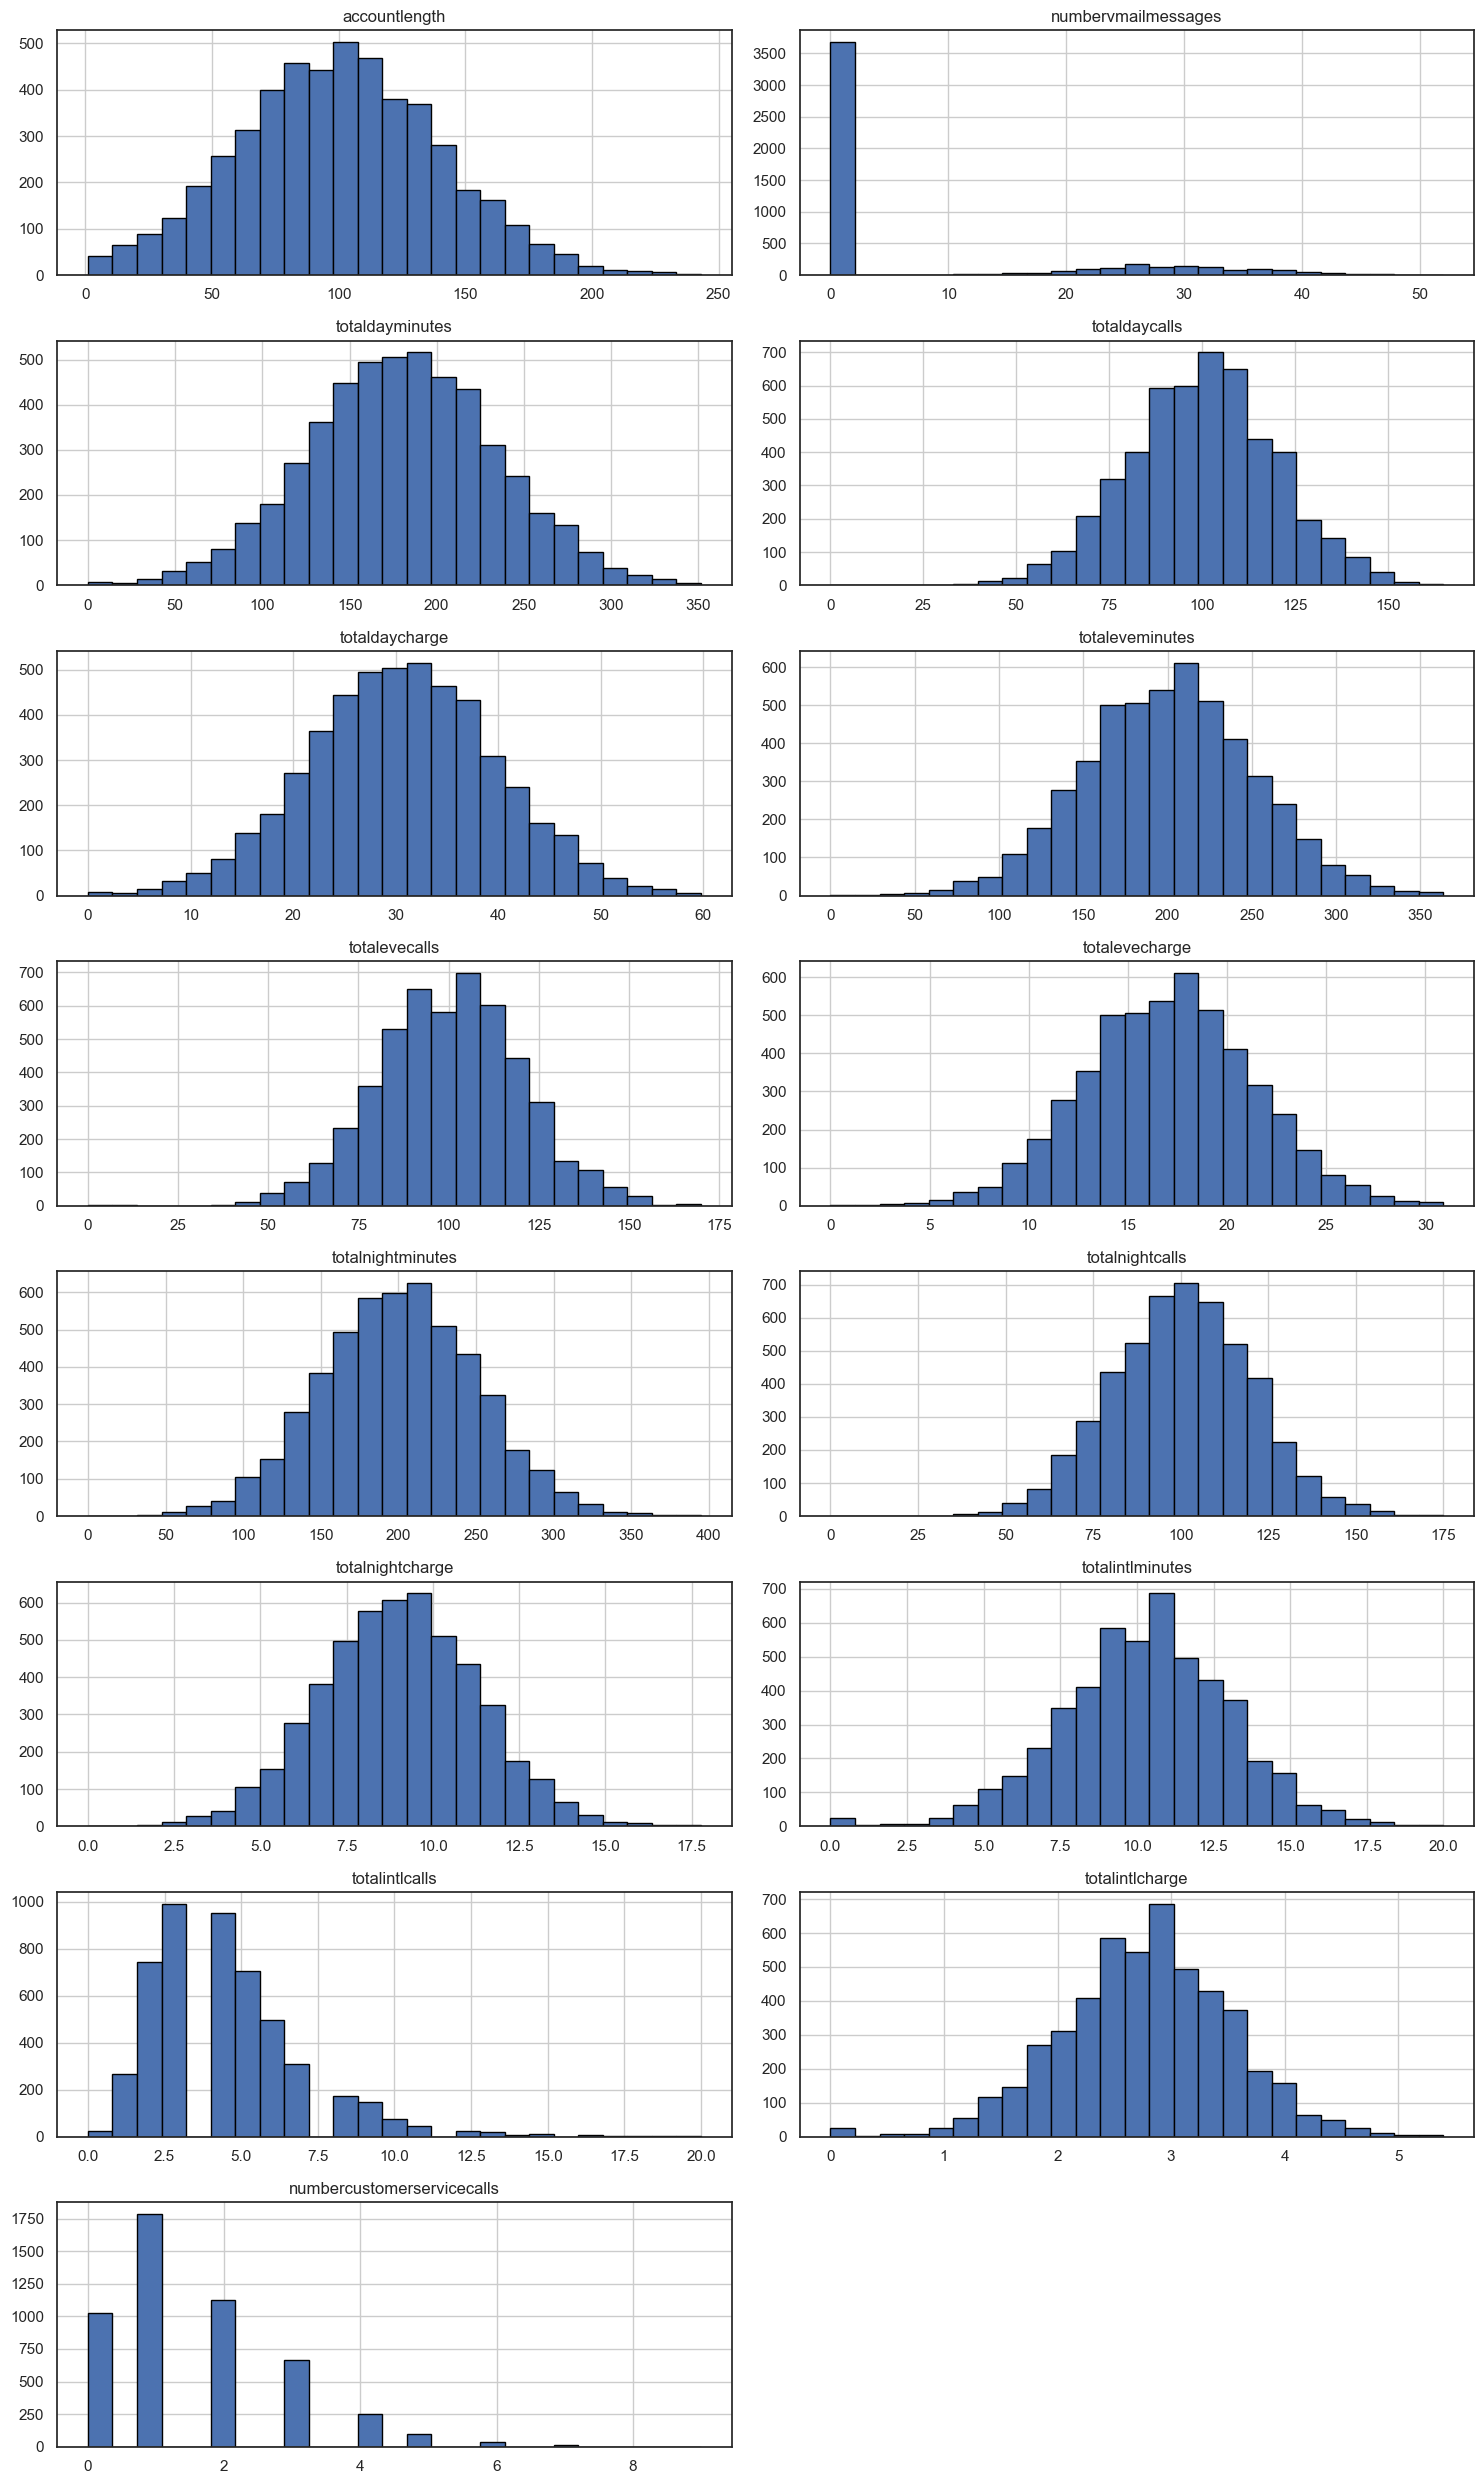

In [81]:
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

In [82]:
# Scale all numeric columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.5,1.5,1.2,0.4,1.2,-0.1,-0.0,-0.1,0.7,-0.3,0.7,-0.1,-0.3,-0.1,0.0
1,0.1,1.5,-0.3,0.9,-0.3,-0.1,0.1,-0.1,0.8,0.1,0.8,1.0,-0.3,1.0,0.0
2,0.7,0.0,0.9,0.5,0.9,-1.2,0.4,-1.2,-0.6,0.2,-0.6,0.5,0.3,0.5,-1.0
3,-0.3,0.0,1.6,-1.1,1.6,-2.1,-0.4,-2.1,-0.1,-0.4,-0.1,-1.1,1.0,-1.1,1.0
4,-0.5,0.0,-0.2,0.5,-0.2,-0.8,0.8,-0.8,-0.2,0.8,-0.2,-0.1,-0.3,-0.1,2.0


- Label Encoding: Ordinal relationship... like low, medium, and high.
- One Hot Encoding: create a new binary column for each sub-cat in a feature/col.  Creates a HUGE sparse matrix. 
- Dummy Encoding: multiple cat and the cat are NOT ordinal.  Order does NOT matter.
- Hash Encoding: good when there is HIGH cardinality of a cat variable. In other words, when there are a large number of unique values
- Count Encoding: replace the cat with their frequency counts. Good for high cardinality.

In [83]:
# Drop the target variable from the DF
catDF=catDF.drop(['churn'],axis=1)

In [84]:
catDF.head()

,internationalplan,voicemailplan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [85]:
# Encode your cat data
catDF = pd.get_dummies(catDF)

In [86]:
catDF.head()

,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [87]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['churn']

(5000, 19)


In [88]:
# Feature Importance

In [89]:
# Tree models have trouble turning strings to float to labelel the target
Y = Y.replace(to_replace=['No','Yes'],value=[0,1]) #this is manual encoding
print(Y.shape)
Y.head()

(5000,)


0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [90]:
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier

iris = load_iris() 
A, B = iris.data, iris.target

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A, B)

importances = rf.feature_importances_
importances
# Print the feature importances with the corresponding column names
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")
    
#drop the features which are multi-collinear and then run model again
#drop a feature nonetheless and run model again; if the model deteriorates then the f
#feature is important; if dropping the column does not affect the model then it is not
# important, drop it (this is called permutation importance)

RandomForestClassifier(random_state=42)

array([0.10612762, 0.02167809, 0.43612951, 0.43606478])

sepal length (cm): 0.10612761987750428
sepal width (cm): 0.02167809317736852
petal length (cm): 0.4361295069034437
petal width (cm): 0.43606478004168353


In Random Forest Classifier, feature importance weights refer to the relative importance of each feature in the training data. The algorithm calculates feature importance by measuring how much each feature contributes to decreasing the weighted impurity of the tree. The more a feature reduces impurity, the more important it is considered.

The feature importance weights can be used to identify which features have the most impact on the model's predictions and which features can be safely removed without significantly affecting performance. This information can be useful for selecting relevant features, reducing dimensionality, and improving model interpretability.

*Tree based models will not work with highly correlated features ie.. multi-collinearity as it will give higher weights to both of these variables*

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

In [92]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)


array([0.08044264, 0.07753329, 0.02426644, 0.01970038, 0.00690673,
       0.02538906, 0.16990805, 0.00964337, 0.17287501, 0.04726982,
       0.00712123, 0.0477349 , 0.01752274, 0.00808935, 0.01508305,
       0.03838077, 0.04495763, 0.04717761, 0.13999794])

                       feature  importance
8               totaldaycharge         0.2
6              totaldayminutes         0.2
18  numbercustomerservicecalls         0.1
0         internationalplan_no         0.1
1        internationalplan_yes         0.1
11              totalevecharge         0.0
9              totaleveminutes         0.0
17             totalintlcharge         0.0
16              totalintlcalls         0.0
15            totalintlminutes         0.0
5          numbervmailmessages         0.0
2             voicemailplan_no         0.0
3            voicemailplan_yes         0.0
12           totalnightminutes         0.0
14            totalnightcharge         0.0
7                totaldaycalls         0.0
13             totalnightcalls         0.0
10               totalevecalls         0.0
4                accountlength         0.0


In [93]:
# Permutation Importance
# Iteratively remove column that are not contributing to model

from sklearn.inspection import permutation_importance
iris = load_iris() 
A,B = iris.data, iris.target

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A,B)

result = permutation_importance(rf, A,B, n_repeats=10, random_state=42) 
importances = result.importances_mean
# Print the feature importances with the corresponding column names
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")

RandomForestClassifier(random_state=42)

sepal length (cm): 0.014666666666666672
sepal width (cm): 0.01266666666666667
petal length (cm): 0.22266666666666665
petal width (cm): 0.18066666666666667


In [94]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean


(5000, 19)


RandomForestClassifier(random_state=0)

In [95]:
print(perm.to_string())

                            AVG_Importance STD_Importance
internationalplan_no                   0.0            NaN
internationalplan_yes                  0.0            NaN
voicemailplan_no                       0.0            NaN
voicemailplan_yes                      0.0            NaN
accountlength                          0.0            NaN
numbervmailmessages                   -0.0            NaN
totaldayminutes                        0.0            NaN
totaldaycalls                          0.0            NaN
totaldaycharge                         0.0            NaN
totaleveminutes                        0.0            NaN
totalevecalls                         -0.0            NaN
totalevecharge                         0.0            NaN
totalnightminutes                      0.0            NaN
totalnightcalls                       -0.0            NaN
totalnightcharge                       0.0            NaN
totalintlminutes                       0.0            NaN
totalintlcalls

In [96]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [97]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.00640000000000005
Feature: 1  Score: -0.006333333333333369
Feature: 2  Score: -0.004066666666666696
Feature: 3  Score: -0.003800000000000059
Feature: 4  Score: -0.0037333333333333884
Feature: 5  Score: -0.0017333333333333645
Feature: 6  Score: -0.0008666666666666933
Feature: 7  Score: 0.0006666666666666043
Feature: 8  Score: 0.0006666666666666043
Feature: 9  Score: 0.0017999999999999462
Feature: 10  Score: 0.0023999999999999577
Feature: 11  Score: 0.0025333333333332876
Feature: 12  Score: 0.00459999999999996
Feature: 13  Score: 0.005199999999999971
Feature: 14  Score: 0.005199999999999971
Feature: 15  Score: 0.0067999999999999615
Feature: 16  Score: 0.028133333333333323
Feature: 17  Score: 0.028133333333333323
Feature: 18  Score: 0.036733333333333305


<BarContainer object of 19 artists>

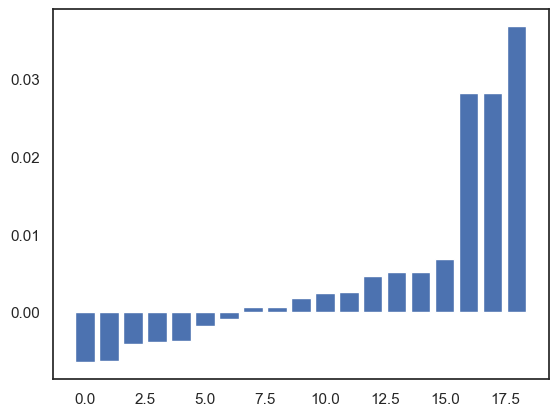

In [98]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Feature 0: numbercustomerservicecalls - Score: 0.036733333333333305
Feature 1: totaldayminutes - Score: 0.028133333333333323
Feature 2: totaldayminutes - Score: 0.028133333333333323
Feature 3: numbervmailmessages - Score: 0.0067999999999999615
Feature 4: internationalplan_no - Score: 0.005199999999999971
Feature 5: internationalplan_no - Score: 0.005199999999999971
Feature 6: totalintlcalls - Score: 0.00459999999999996
Feature 7: totaleveminutes - Score: 0.0025333333333332876
Feature 8: totalevecharge - Score: 0.0023999999999999577
Feature 9: accountlength - Score: 0.0017999999999999462
Feature 10: voicemailplan_no - Score: 0.0006666666666666043
Feature 11: voicemailplan_no - Score: 0.0006666666666666043
Feature 12: totalevecalls - Score: -0.0008666666666666933
Feature 13: totalnightcalls - Score: -0.0017333333333333645
Feature 14: totalnightcharge - Score: -0.0037333333333333884
Feature 15: totalnightminutes - Score: -0.003800000000000059
Feature 16: totaldaycalls - Score: -0.00406666

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 19 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'numbercustomerservicecalls'),
  Text(1, 0, 'totaldayminutes'),
  Text(2, 0, 'numbervmailmessages'),
  Text(3, 0, 'internationalplan_no'),
  Text(4, 0, 'totalintlcalls'),
  Text(5, 0, 'totaleveminutes'),
  Text(6, 0, 'totalevecharge'),
  Text(7, 0, 'accountlength'),
  Text(8, 0, 'voicemailplan_no'),
  Text(9, 0, 'totalevecalls'),
  Text(10, 0, 'totalnightcalls'),
  Text(11, 0, 'totalnightcharge'),
  Text(12, 0, 'totalnightminutes'),
  Text(13, 0, 'totaldaycalls'),
  Text(14, 0, 'totalintlminutes'),
  Text(15, 0, 'totalintlcharge')])

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Feature Importance Scores')

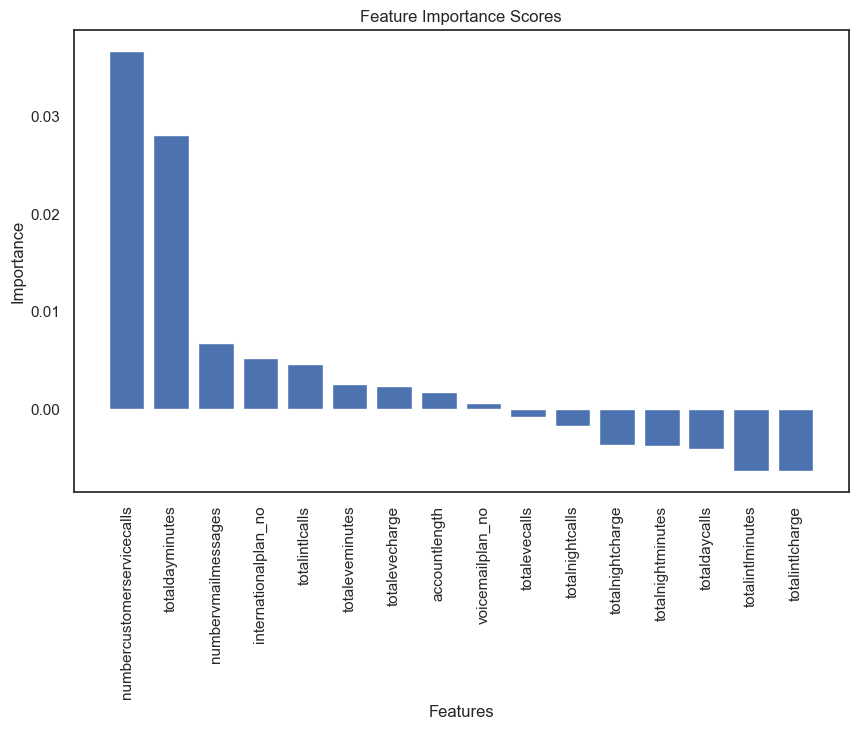

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importance = results.importances_mean

# Get column headers
columns = X.columns

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Reverse the order of the scores to plot them in descending order
importance_sorted = importance_sorted[::-1]

# Get the corresponding column headers for the sorted importance scores
columns_sorted = [columns[np.where(importance == score)[0][0]] for score in importance_sorted]

# Summarize feature importance
for i, (col, score) in enumerate(zip(columns_sorted, importance_sorted)):
    print('Feature {}: {} - Score: {}'.format(i, col, score))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [100]:
# Analyze the Coefficients:

LogisticRegression()

array([-1.0434809 , -0.94723482, -0.21527153, -0.04139081, -0.04026367,
        0.06741511,  0.07531676,  0.13109155,  0.14180777,  0.14919747,
        0.1611474 ,  0.23945351,  0.24275205,  0.46263104,  0.48888544,
        0.50135129,  0.51647076,  0.94716849,  1.04341456])

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 19 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'numbercustomerservicecalls'),
  Text(1, 0, 'totalintlcharge'),
  Text(2, 0, 'totalintlcalls'),
  Text(3, 0, 'totalintlminutes'),
  Text(4, 0, 'totalnightcharge'),
  Text(5, 0, 'totalnightcalls'),
  Text(6, 0, 'totalnightminutes'),
  Text(7, 0, 'totalevecharge'),
  Text(8, 0, 'totalevecalls'),
  Text(9, 0, 'totaleveminutes'),
  Text(10, 0, 'totaldaycharge'),
  Text(11, 0, 'totaldaycalls'),
  Text(12, 0, 'totaldayminutes'),
  Text(13, 0, 'numbervmailmessages'),
  Text(14, 0, 'accountlength'),
  Text(15, 0, 'voicemailplan_yes'),
  Text(16, 0, 'voicemailplan_no'),
  Text(17, 0, 'internationalplan_yes'),
  Text(18, 0, 'internationalplan_no')])

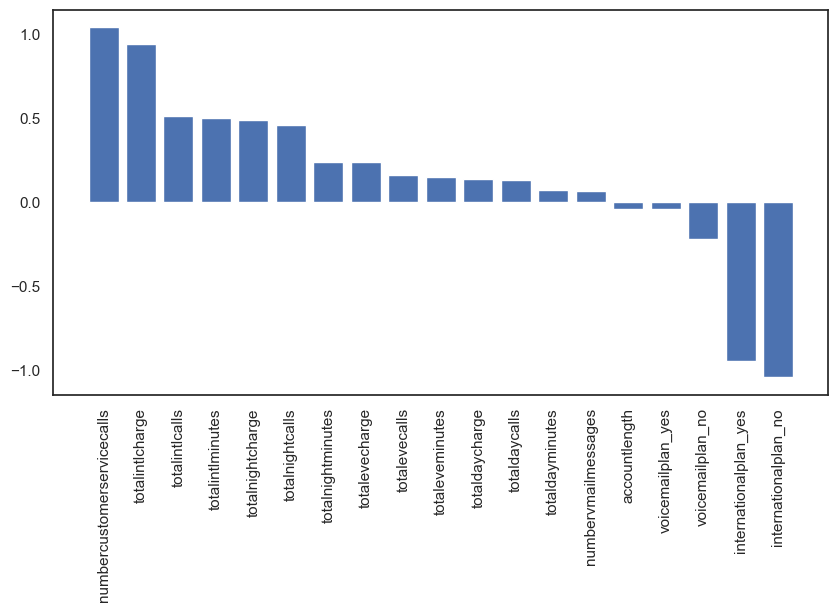

In [101]:
# Coefficients
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

LinearRegression()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Feature 2'),
  Text(1, 0, 'Feature 3'),
  Text(2, 0, 'Feature 8'),
  Text(3, 0, 'Feature 0'),
  Text(4, 0, 'Feature 9'),
  Text(5, 0, 'Feature 7'),
  Text(6, 0, 'Feature 1'),
  Text(7, 0, 'Feature 6'),
  Text(8, 0, 'Feature 5'),
  Text(9, 0, 'Feature 4')])

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Feature Importance Scores')

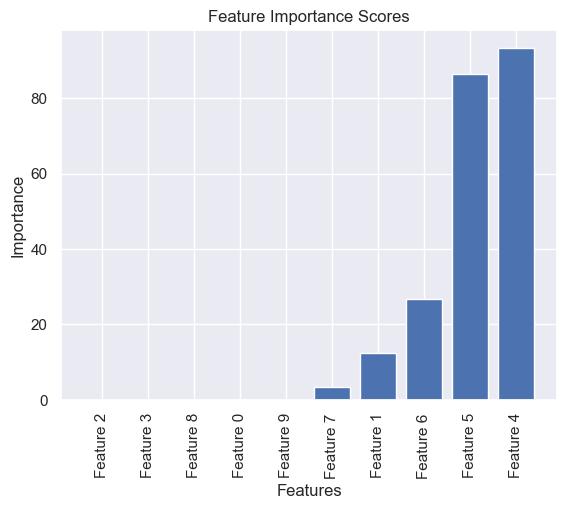

In [102]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a regression dataset with 10 features and 5 informative features
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Get the feature importances (i.e., coefficients) from the model
importance = model.coef_

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Get the corresponding column names for the sorted importance scores
columns_sorted = [f'Feature {i}' for i in np.argsort(importance)]

# Plot the feature importances in ascending order
sns.set_style("darkgrid")
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [103]:
# RFE : Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to reduce the number of features in a dataset. It works by recursively removing features from the dataset and building a model on the remaining features until the desired number of features is reached.

The RFE algorithm starts with all the features in the dataset and fits a model using them. It then ranks the importance of each feature based on its contribution to the model's performance. The least important feature(s) are removed, and a new model is trained on the remaining features. This process is repeated until only the desired number of features remains.

The RFE algorithm can be used with any machine learning algorithm that provides some measure of feature importance, such as linear regression or random forests. The choice of algorithm depends on the type of problem you are trying to solve and your data.One advantage of RFE is that it can help improve model performance by reducing overfitting caused by irrelevant or redundant features. It can also make models more interpretable by identifying which features are most important for making accurate predictions.

In [106]:
# Import libraries
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into X (features) and y (target)
X = diabetes.data
y = diabetes.target

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFE(model, n_features_to_select=5, verbose=1)
X_rfe = rfe.fit_transform(X, y)

# Get the feature ranking and scores
feature_ranking = rfe.ranking_
feature_scores = rfe.estimator_.coef_

# Convert the boolean mask to an integer array
selected_features = np.where(rfe.support_)[0]

# Print the feature ranking and scores
for i in range(len(feature_ranking)):
    print(f'Feature {i+1}: {diabetes.feature_names[i]} - Ranking: {feature_ranking[i]} - Score: {feature_scores[i]}')

# Print the selected features
print('Selected features:', [diabetes.feature_names[i] for i in selected_features])


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Feature 1: age - Ranking: 6 - Score: 562.5892404670939
Feature 2: sex - Ranking: 2 - Score: 274.07219131164936
Feature 3: bmi - Ranking: 1 - Score: -545.959565091712
Feature 4: bp - Ranking: 1 - Score: 341.09418943999844
Feature 5: s1 - Ranking: 1 - Score: 730.1466944047893


IndexError: index 5 is out of bounds for axis 0 with size 5

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


<BarContainer object of 10 artists>

[Text(0, 0, 'age'),
 Text(0, 1, 'sex'),
 Text(0, 2, 'bmi'),
 Text(0, 3, 'bp'),
 Text(0, 4, 's1'),
 Text(0, 5, 's2'),
 Text(0, 6, 's3'),
 Text(0, 7, 's4'),
 Text(0, 8, 's5'),
 Text(0, 9, 's6')]

Text(0.5, 0, 'Ranking')

Text(0.5, 1.0, 'Feature Rankings')

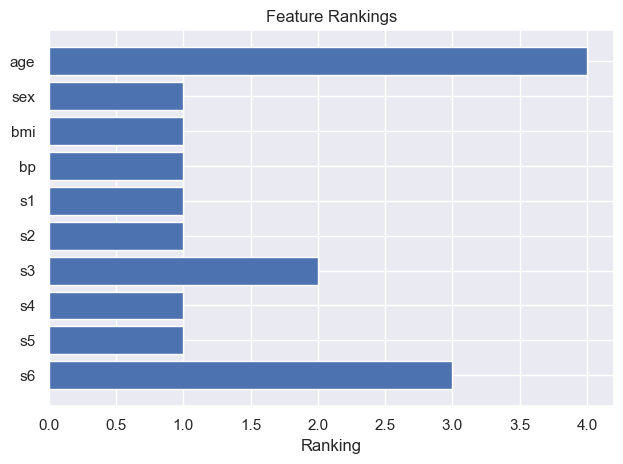

In [107]:
# Import libraries
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into X (features) and y (target)
X = diabetes.data
y = diabetes.target

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFE(model, n_features_to_select=7, verbose=1)
X_rfe = rfe.fit_transform(X, y)

# Get the feature ranking and scores
feature_ranking = rfe.ranking_
feature_scores = rfe.estimator_.coef_

# Create a horizontal bar plot of the feature rankings
fig, ax = plt.subplots()
ax.barh(range(len(feature_ranking)), feature_ranking)
ax.set_yticks(range(len(feature_ranking)))
ax.set_yticklabels(diabetes.feature_names)
ax.invert_yaxis()
ax.set_xlabel('Ranking')
ax.set_title('Feature Rankings')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('feature_rankings.png')


Explained variance ratio: [0.92461872 0.05306648]


Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'PCA of Iris Dataset')

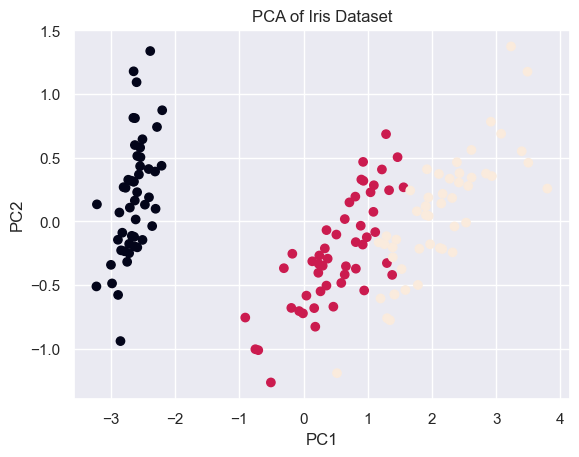

In [108]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Split the dataset into X (features) and y (target)
X = iris.data
y = iris.target

# Create a PCA object with two components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio for each component
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.show()
